In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
import string
from string import ascii_letters, punctuation, digits
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
import os
import sklearn
import mpl_toolkits
from sklearn import preprocessing
products1 = pd.read_csv("amz_com-ecommerce_sample.csv", encoding= 'unicode_escape')
products1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [5]:
products2 = pd.read_csv("flipkart_com-ecommerce_sample.csv", encoding= 'unicode_escape')
products2.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [6]:
products1.shape

(20000, 15)

In [7]:
products2.shape

(20000, 15)

In [8]:
products1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [9]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [10]:
print(products1.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [11]:
products1 = products1.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'retail_price', 'discounted_price', 
                          'image', 'product_rating', 'overall_rating', 'is_FK_Advantage_product',
                          'product_specifications'], axis = 1)
products2 = products2.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'retail_price', 'discounted_price', 
                          'image', 'product_rating', 'overall_rating', 'is_FK_Advantage_product',
                          'product_specifications'], axis = 1)
     

In [12]:
products1.head()

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [13]:
products2.head()

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [14]:
temp_df1 = products1.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df1 = temp_df1[temp_df1['brand'].notna()]
temp_df1

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WALLDESIGN SMALL VINYL STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,WALLMANTRA LARGE VINYL STICKERS STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,ELITE COLLECTION MEDIUM ACRYLIC STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,ELITE COLLECTION MEDIUM ACRYLIC STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [15]:
temp_df2 = products2.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df2 = temp_df2[temp_df2['brand'].notna()]
temp_df2

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [16]:
brands_df1 = list(dict.fromkeys(list(temp_df1.loc[:, 'brand'].values)))

brand_keys1 = [] #corresponds to the unique brand names
brand_freq1 = [] #corresponds to the count of the product for a brand

for brand in brands_df1:
  #getting the count for that brand
  count = np.sum(temp_df1.loc[:, 'brand'].values == brand)
  if count>=10:
    brand_keys1.append(brand)
    brand_freq1.append(count)

In [17]:
max_count1 = max(brand_freq1)
idx1 = brand_freq1.index(max_count1)
print("The brand having maximum amount of products on Flipkart is {} with {} many products".format(brand_keys1[idx1],max_count1))

The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products


In [18]:
brands_df2 = list(dict.fromkeys(list(temp_df2.loc[:, 'brand'].values)))
brand_keys2 = [] #corresponds to the unique brand names
brand_freq2 = [] #corresponds to the count of the product for a brand

for brand in brands_df2:
  #getting the count for that brand
  count = np.sum(temp_df2.loc[:, 'brand'].values == brand)
  if count>=10:
    brand_keys2.append(brand)
    brand_freq2.append(count)

In [19]:
max_count2 = max(brand_freq2)
idx2 = brand_freq2.index(max_count2)
print("The brand having maximum amount of products on Flipkart is {} with {} many products".format(brand_keys2[idx2],max_count2))

The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products


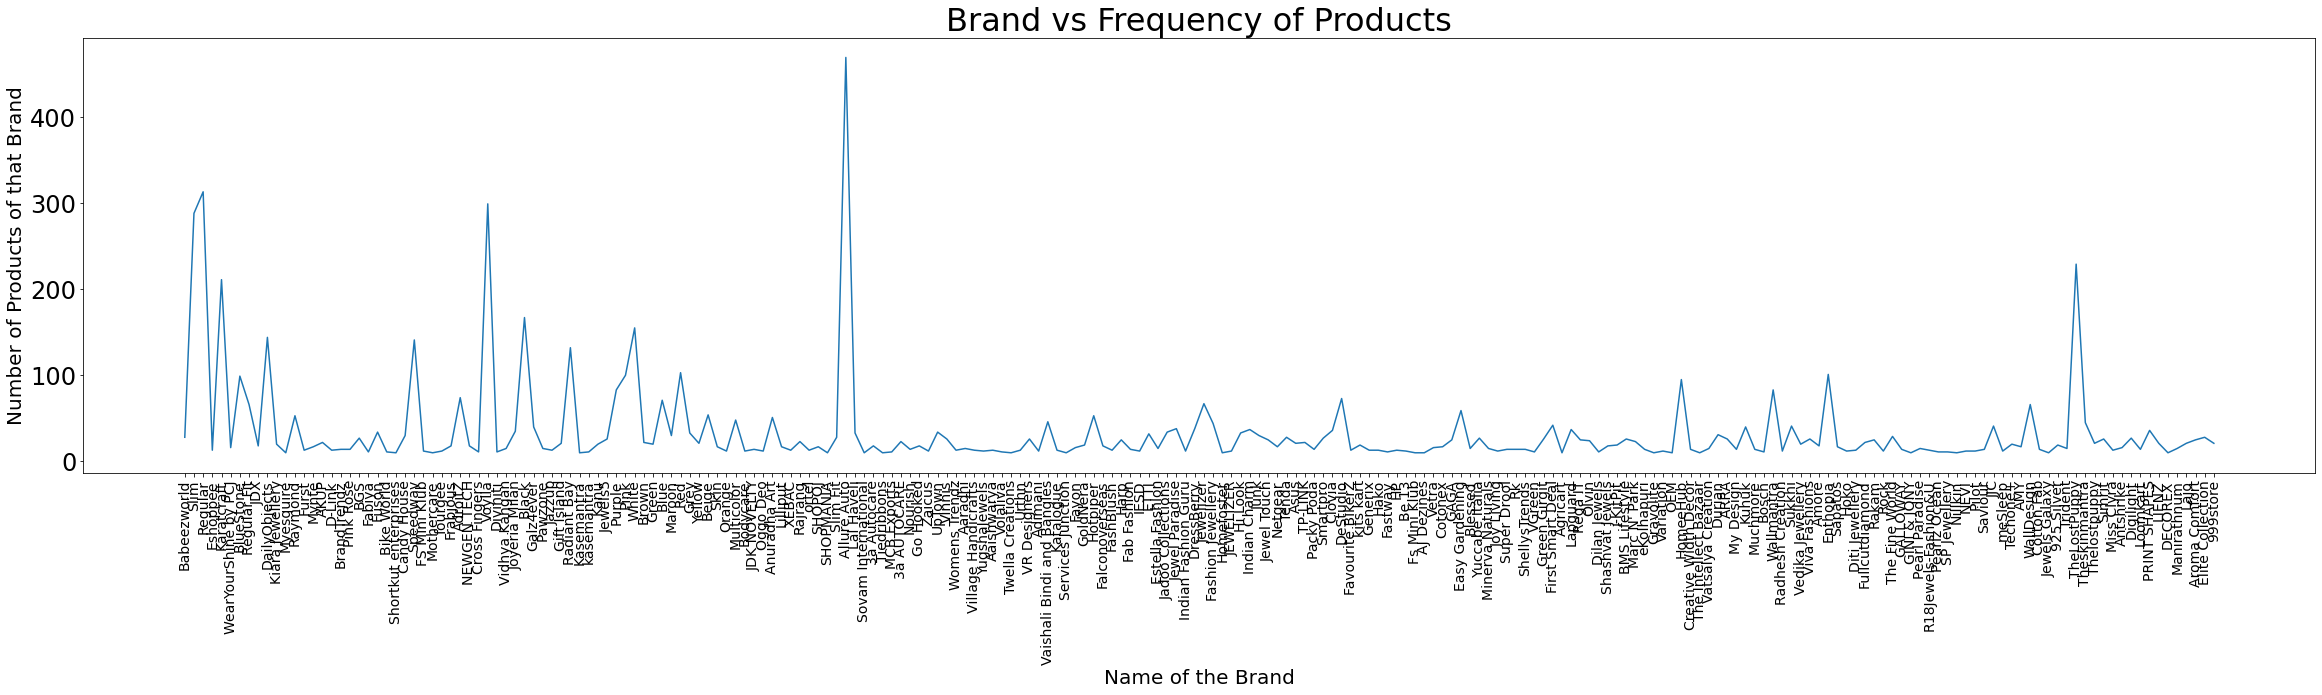

In [20]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys1, y=brand_freq1)
plt.show()

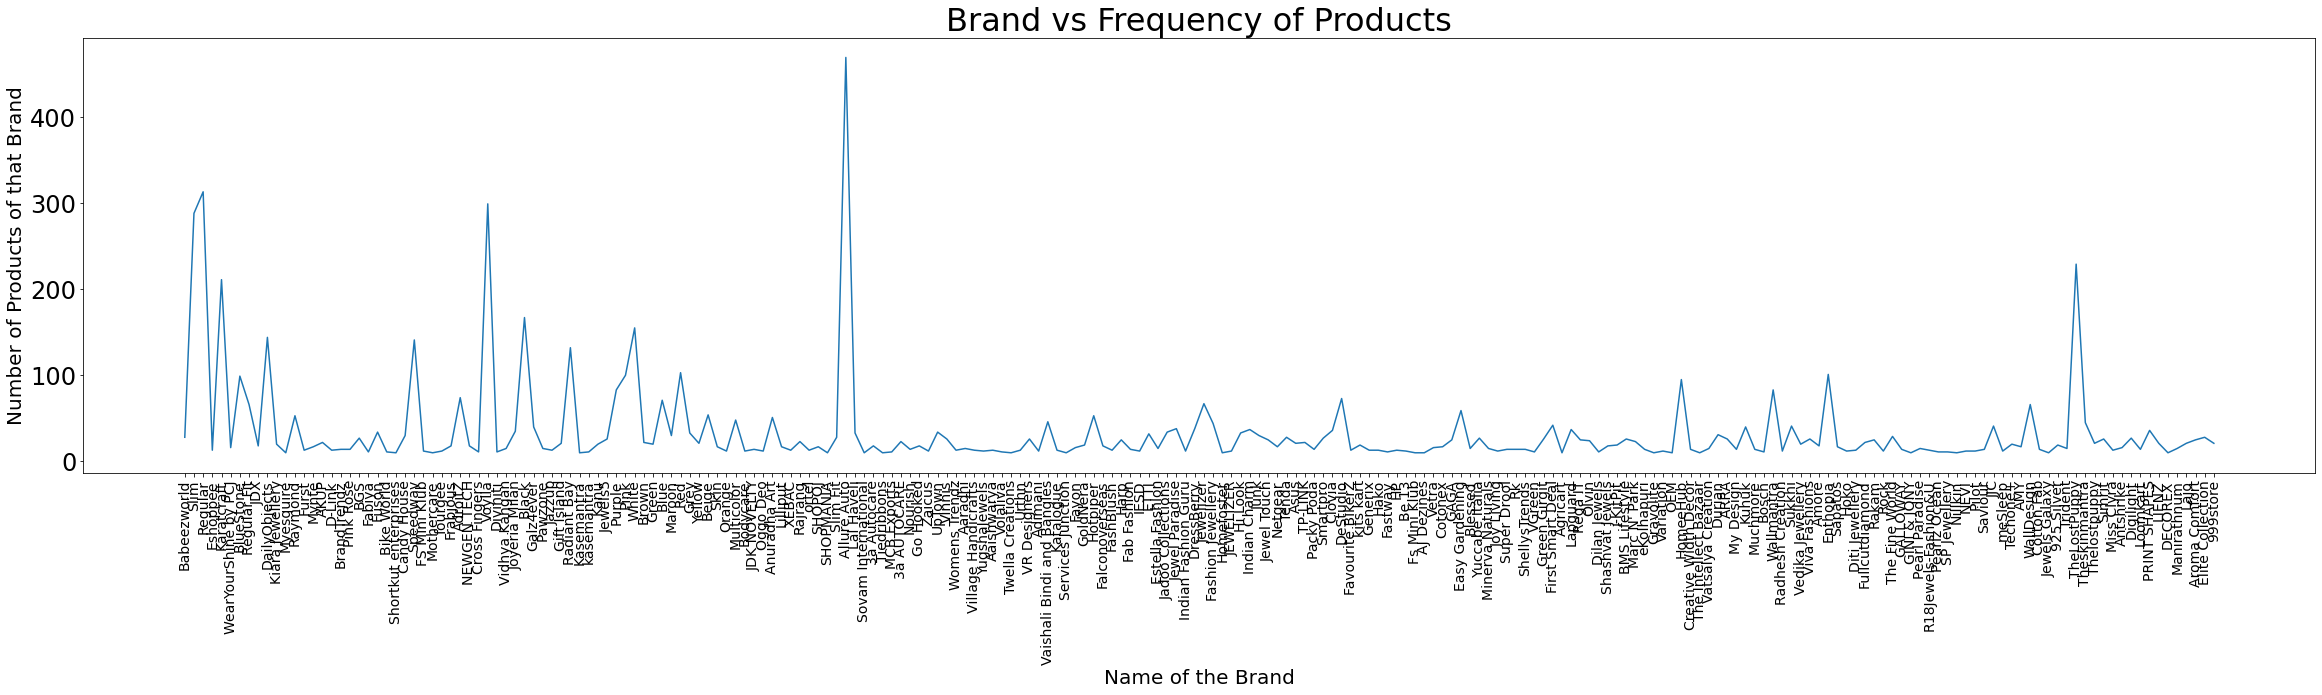

In [21]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys2, y=brand_freq2)
plt.show()

In [22]:
categories_in_df = list(dict.fromkeys(list(products1.loc[:,'product_category_tree'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))

for category in categories_in_df:
  count = np.sum(products1.loc[:, 'product_category_tree'].values == category)
  if(count>=10):
    print(category,"\t",count)

The unique Product Categories in this dataset are 6466
["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 118
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 20
["Jewellery >> Rings"] 	 710
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> TeeMoods Tops"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> SFDS Tops"] 	 10
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Ozel Studio Tops"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 12
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 87
["Mobiles & Accessorie

["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Cutecumber Dresses"] 	 10
["Clothing >> Men's Clothing >> T-Shirts >> CampusMall T-Shirts"] 	 17
["Mobiles & Accessories >> Mobile Accessories >> Mobile Pouches >> i-KitPit Mobile Pouches"] 	 19
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> BMS Lifestyle Cases & Covers"] 	 26
["Clothing >> Women's Clothing >> Leggings & Jeggings >> Akfoster Leggings & Jeggings"] 	 12
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Clovia Bras"] 	 22
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Bralux Bras"] 	 10
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Exterior >> Door & Bumper Guards"] 	 18
["Clothing >> Men's Clothing >> T-Shirts >> Nucode T-Shirts"] 	 44
["Clothing >> Men's Clothing >> Shirts >> Casual & Party Wear Shirts >> Marc N' Park Casual & Party Wear Shirts >> Marc N' Park Men's Solid Casual Shirt"] 	 18
["Jewel

["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Camisoles & Slips >> LIENZ Camisoles & Slips >> LIENZ Women's Camisole"] 	 21
["Home Furnishing >> Floor Coverings >> Carpets & Rugs >> Loomkart Multicolor Cotton Dhurrie (120 cm  X 18..."] 	 12
["Clothing >> Women's Clothing >> Ethnic Wear >> Ethnic Sets >> Lajo Ethnic Sets >> Lajo Women's Salwar and Dupatta Set"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Meiro Dresses"] 	 14
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Indi Bargain Dresses"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Ladybug Dresses"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Mayra Dresses"] 	 11
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Hugo Chavez Dresses"] 	 26
["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Miss Cha

In [23]:
categories_in_df = list(dict.fromkeys(list(products2.loc[:,'product_category_tree'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))

for category in categories_in_df:
  count = np.sum(products2.loc[:, 'product_category_tree'].values == category)
  if(count>=10):
    print(category,"\t",count)

The unique Product Categories in this dataset are 6466
["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 118
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 20
["Jewellery >> Rings"] 	 710
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> TeeMoods Tops"] 	 16
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> SFDS Tops"] 	 10
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Ozel Studio Tops"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 12
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 87
["Mobiles & Accessorie

["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Aero Care Combos"] 	 14
["Computers >> Laptop Accessories >> Adapters >> Smartpro Adapters >> Smartpro 19.5v,3.9a Replacement Charger for Vaio..."] 	 25
["Home Decor & Festive Needs >> Wall Decor & Clocks >> Clocks >> Wall Clocks >> Blacksmith Wall Clocks"] 	 20
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> Fastway Cases & Covers"] 	 11
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"] 	 332
["Home Improvement >> Lawn & Gardening >> Plants >> Plant Seeds"] 	 20
["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"] 	 31
["Computers >> Laptop Accessories >> Batteries >> Rega IT Batteries"] 	 14
["Computers >> Laptop Accessories >> Batteries >> HP Batteries"] 	 10
["Watches >> Wrist Watches >> Fastrack Wrist Watches"] 	 20
["Watches >> Wrist Watches >> Sonata Wrist Watches"] 	 56
["Watches >> Wrist Watches >> Times Wrist Watches"] 	 23

["Footwear >> Men's Footwear >> Casual Shoes >> Knotty Derby Casual Shoes"] 	 15
["Tools & Hardware >> Tools >> Tool Accessories >> Safety Gear >> Safety Helmets"] 	 14
["Cameras & Accessories >> Camera Accessories >> Lens Hoods >> JJC Lens Hoods"] 	 41
["Footwear >> Men's Footwear >> Casual Shoes >> Arstoreindia Casual Shoes"] 	 10
["Tools & Hardware >> Tools >> Tool Accessories >> Screwdriver Bit Sets"] 	 11
["Computers >> Laptop Accessories >> USB Gadgets >> Techone+ USB Gadgets"] 	 20
["Sports & Fitness >> Team Sports >> Basketball >> BasketBalls >> Kipsta BasketBalls"] 	 10
["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtis >> Shopping Karega Kurtis"] 	 11
["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtis >> Shop Rajasthan Kurtis"] 	 16
["Home Furnishing >> Living"] 	 18
["Pens & Stationery >> Office Supplies >> AMY Office Supplies"] 	 17
["Clothing >> Men's Clothing >> Shirts >> Casual & Party Wear Shirts >> Orange Valley Casual & 

In [24]:
primary_category1 = products1["product_category_tree"].tolist()

#lowercasing the categories to prevent duplicate categories and removal of punctuations like ">>", etc
for i in range(len(primary_category1)):
  primary_category1[i] = primary_category1[i].lower()
  primary_category1[i] = primary_category1[i].replace('["',"")
  primary_category1[i] = primary_category1[i].replace('"]',"")
  primary_category1[i] = primary_category1[i].replace(" ","")
  primary_category1[i] = primary_category1[i].split(">>") 
  primary_category1[i] = primary_category1[i][0]

print(primary_category1)
print(len(primary_category1))

['clothing', 'furniture', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'furniture', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'pens&stationery', 'clothing', 'furniture', 'footwear', 'clothing', 'furniture', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'beautyandpersonalcare', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'pens&stationery', 'pens&stationery', 'pens&stationery', 'clothing', 'pens&stationery', 'clothing', 'bags,wallets&belts', 'clothing', 'footwear', 'homedecor&festiveneeds', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsummersiblesinglephasepumpcontroller...', "masarasolidwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", 'tools&hardw

In [25]:
primary_category2 = products2["product_category_tree"].tolist()

#lowercasing the categories to prevent duplicate categories and removal of punctuations like ">>", etc
for i in range(len(primary_category2)):
  primary_category2[i] = primary_category2[i].lower()
  primary_category2[i] = primary_category2[i].replace('["',"")
  primary_category2[i] = primary_category2[i].replace('"]',"")
  primary_category2[i] = primary_category2[i].replace(" ","")
  primary_category2[i] = primary_category2[i].split(">>") 
  primary_category2[i] = primary_category2[i][0]

print(primary_category2)
print(len(primary_category2))

['clothing', 'furniture', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'furniture', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'pens&stationery', 'clothing', 'furniture', 'footwear', 'clothing', 'furniture', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'beautyandpersonalcare', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'pens&stationery', 'pens&stationery', 'pens&stationery', 'clothing', 'pens&stationery', 'clothing', 'bags,wallets&belts', 'clothing', 'footwear', 'homedecor&festiveneeds', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsummersiblesinglephasepumpcontroller...', "masarasolidwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", 'tools&hardw

The length of the unique Product Categories after some filtering is 265


<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories', ylabel='Frequency'>

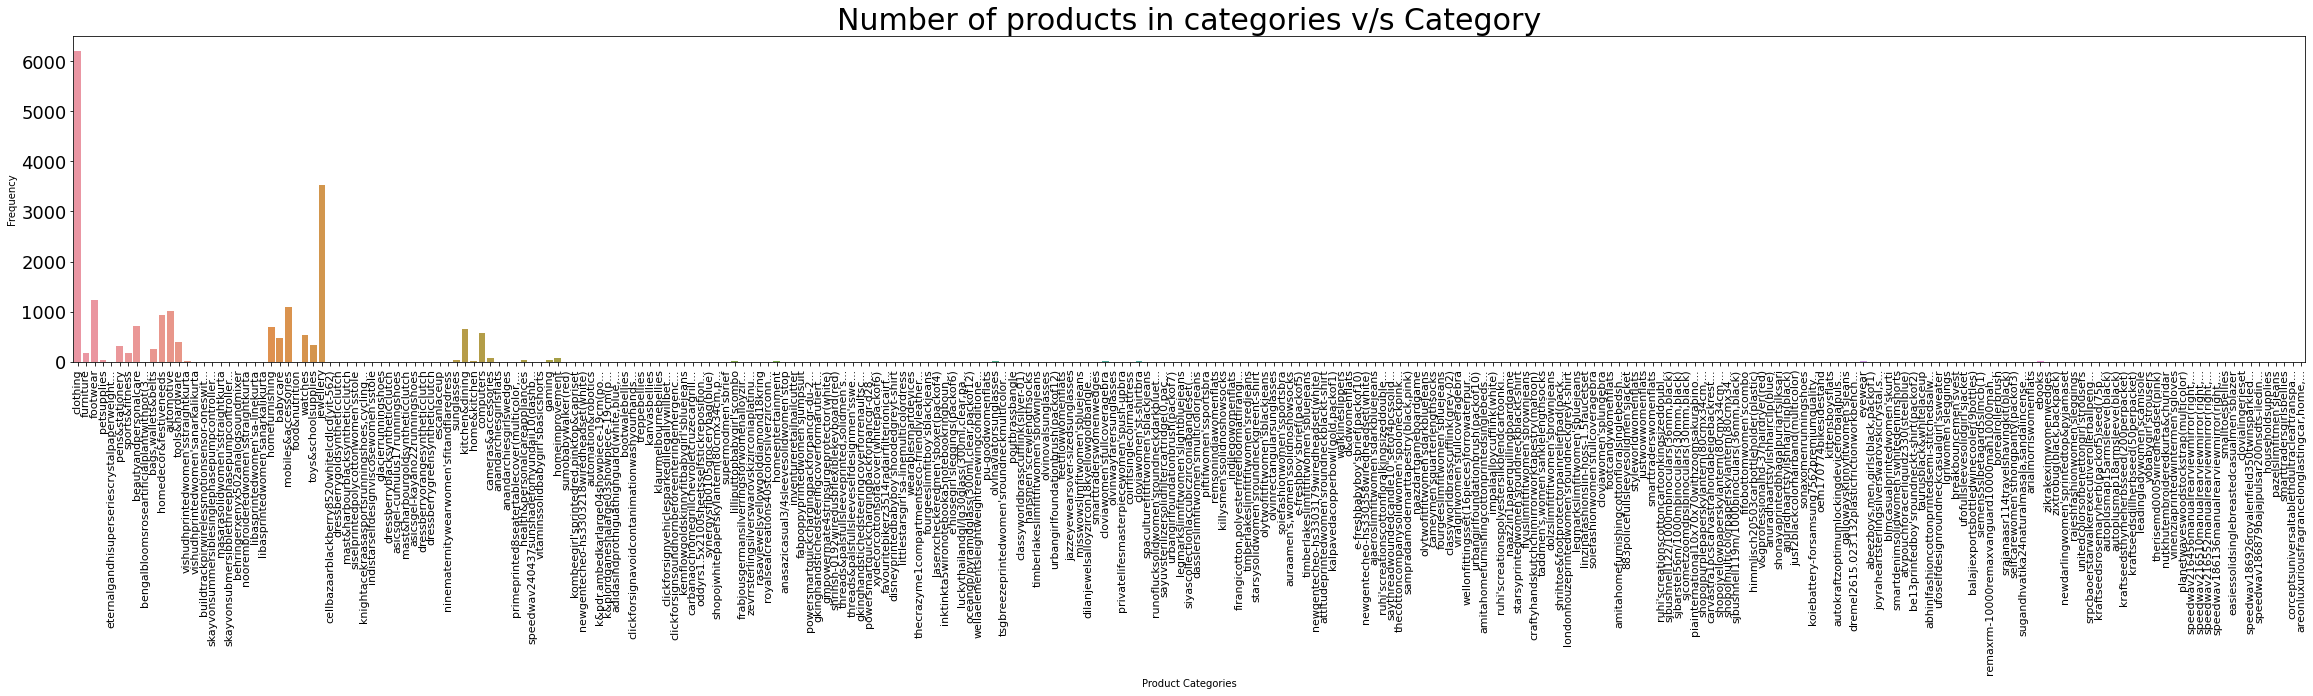

In [26]:
primary_category_count1 = Counter(primary_category1)
print("The length of the unique Product Categories after some filtering is {}".format(len(primary_category_count1)))

all_categories_temp1=[]
count_temp1=[]

for keys,vals in primary_category_count1.items():
  all_categories_temp1.append(keys)
  count_temp1.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories_temp1, y=count_temp1)

The length of the unique Product Categories after some filtering is 265


<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories', ylabel='Frequency'>

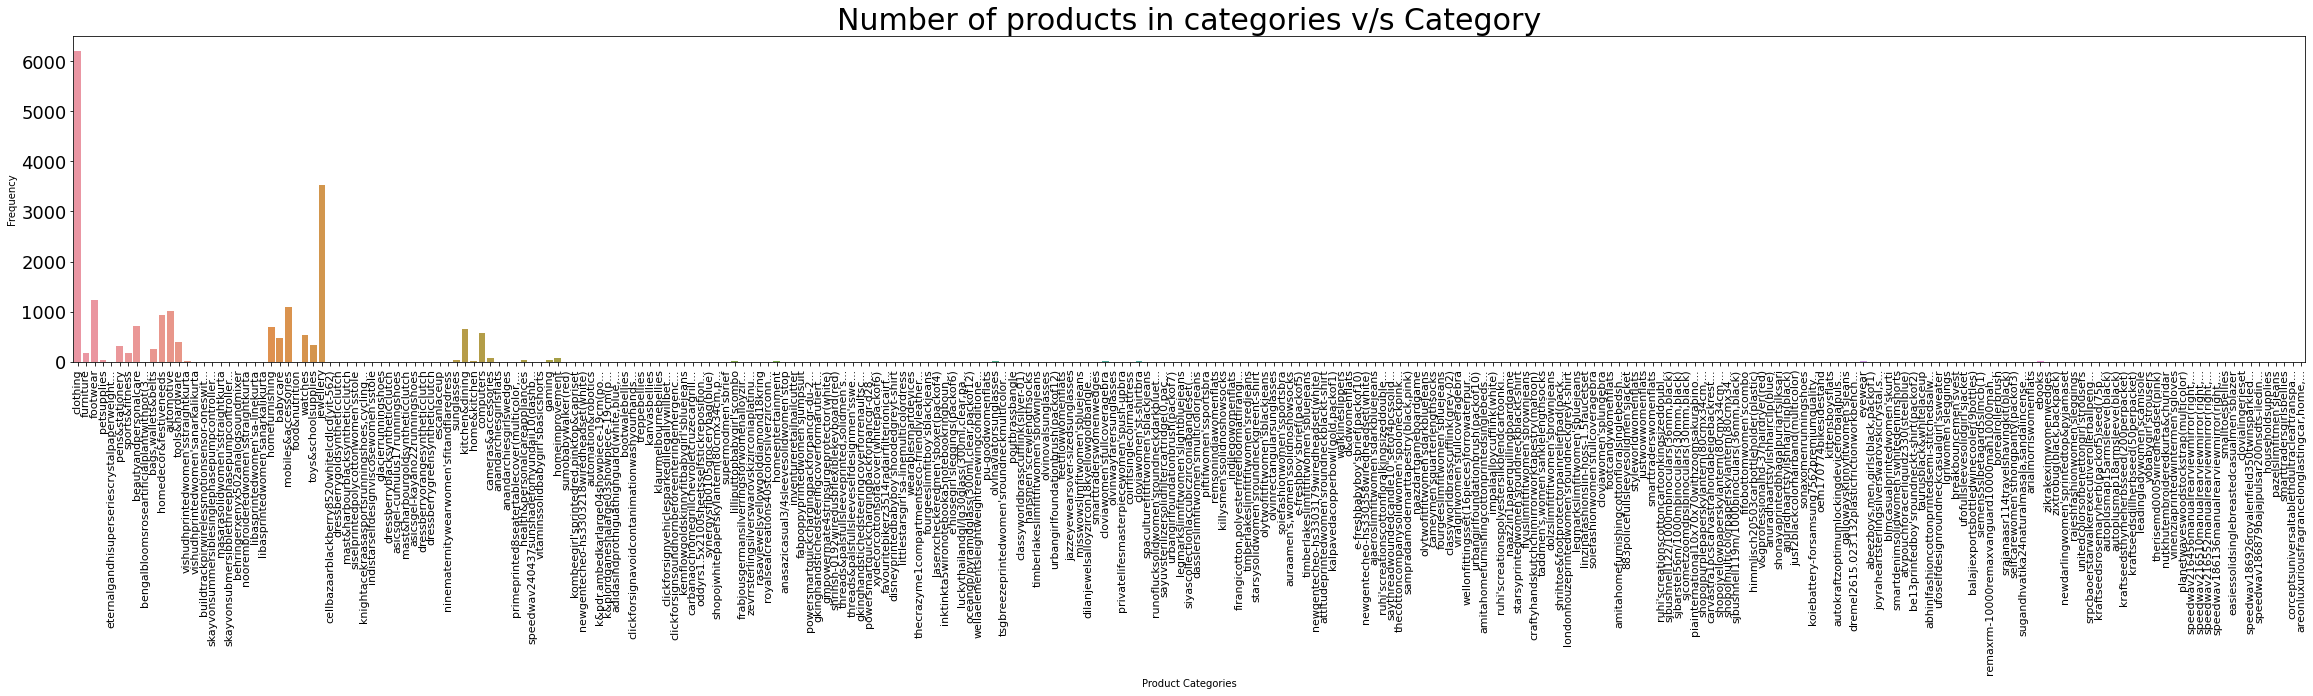

In [27]:
primary_category_count2 = Counter(primary_category2)
print("The length of the unique Product Categories after some filtering is {}".format(len(primary_category_count2)))

all_categories_temp2=[]
count_temp2=[]

for keys,vals in primary_category_count2.items():
  all_categories_temp2.append(keys)
  count_temp2.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories_temp2, y=count_temp2)

<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories having frequency at least 10', ylabel='Frequency'>

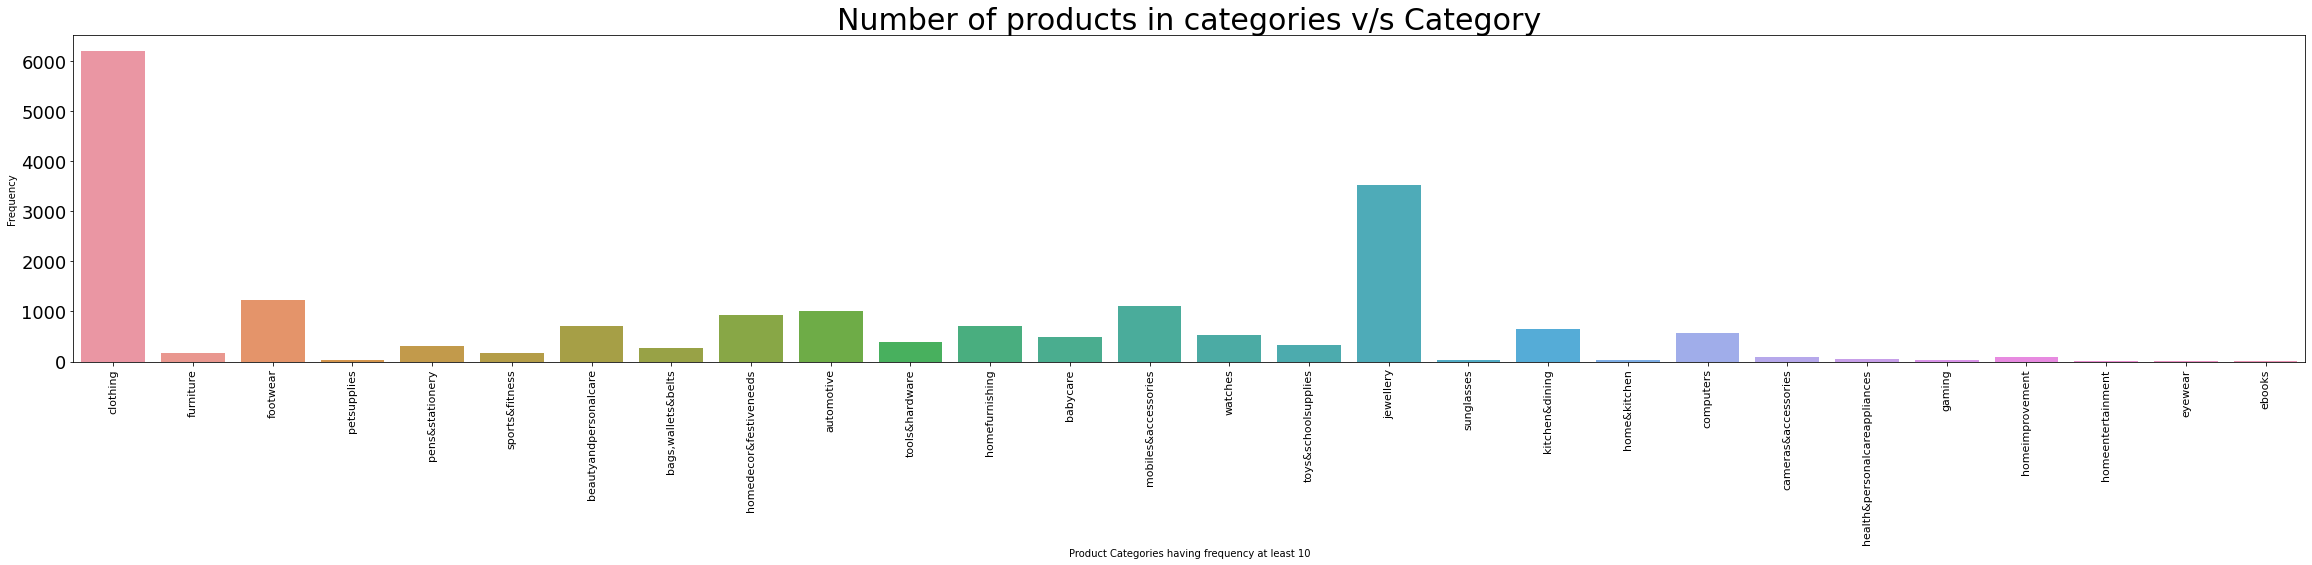

In [28]:
all_categories1=[]
count1=[]

for keys,vals in primary_category_count1.items():
  #choosing only those categories which have at least 10 producrs
  if(vals>=10):
    all_categories1.append(keys)
    count1.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories1, y=count1)
     

<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories having frequency at least 10', ylabel='Frequency'>

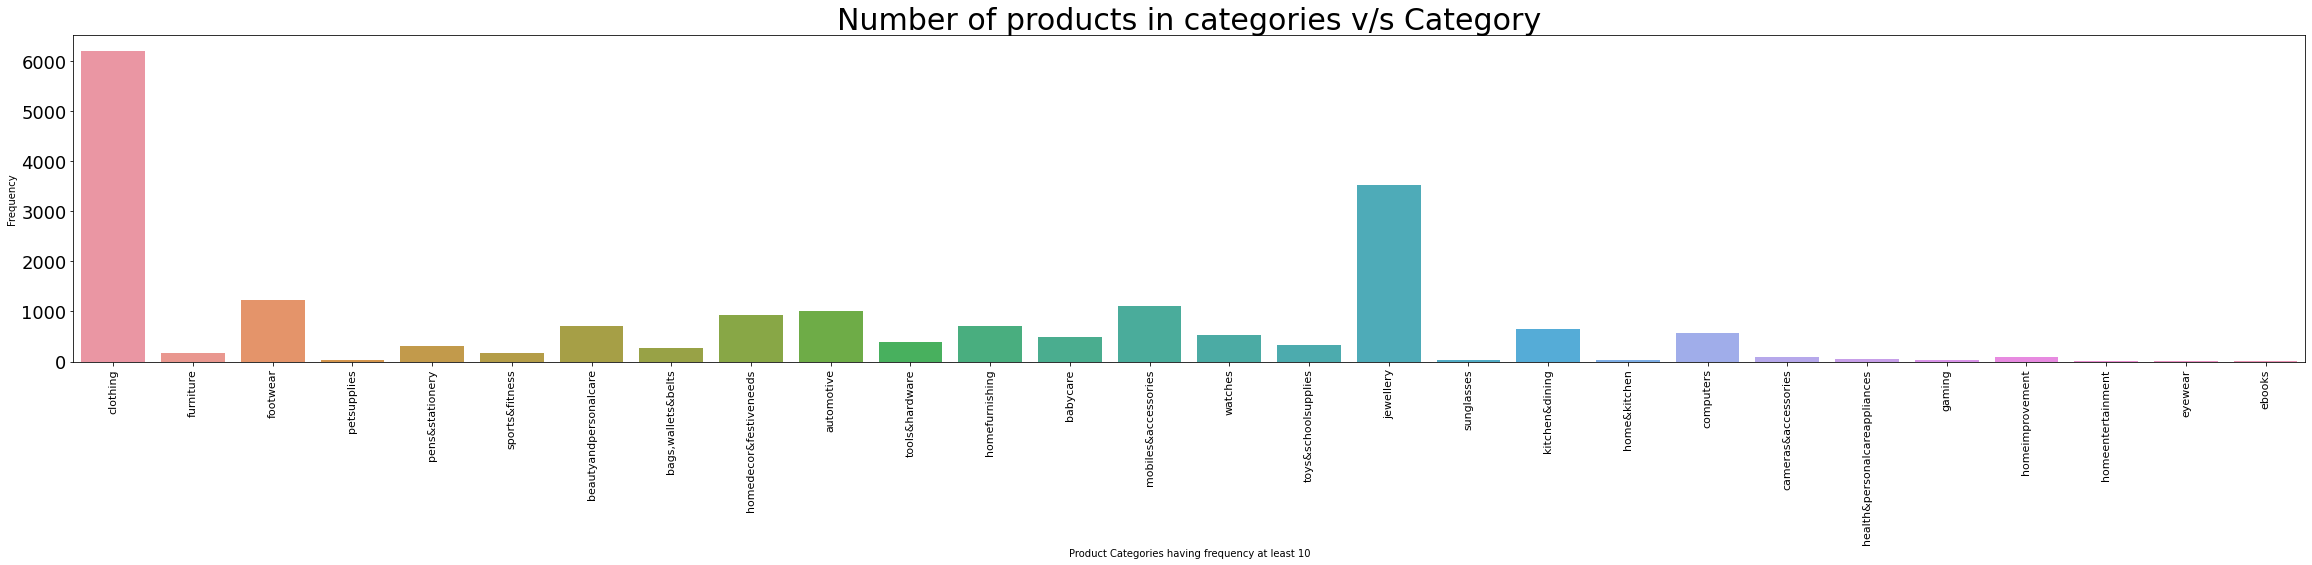

In [29]:
all_categories2=[]
count2=[]

for keys,vals in primary_category_count1.items():
  #choosing only those categories which have at least 10 producrs
  if(vals>=10):
    all_categories2.append(keys)
    count2.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories2, y=count2)
     

In [30]:
revised_categories1 = [None]*len(primary_category1)

for i in range(len(primary_category1)):
  if primary_category1[i]=="homeimprovement" or primary_category1[i]=="homedecor&festiveneeds" or primary_category1[i]=='home&kitchen' or primary_category1[i]=="kitchen&dining" or primary_category1[i]=="homefurnishing" or primary_category1[i]=="furniture" or primary_category1[i]=="homeentertainment":
    revised_categories1[i] = 'homefurnishing/kitchen'
  elif primary_category1[i]=='pens&stationery':
    revised_categories1[i] = 'toys&schoolsupplies'
  elif primary_category1[i]=='gaming' or primary_category1[i]=='cameras&accessories' or primary_category1[i]=='computers' or primary_category1[i]=="mobiles&accessories":
    revised_categories1[i]='electronics'
  elif primary_category1[i]=='health&personal care appliances' or primary_category1[i]=='beautyandpersonalcare' or primary_category1[i]=='eyewear' or primary_category1[i]=='sunglasses' or primary_category1[i]=='watches' or primary_category1[i]=='bags,wallets&belts' or primary_category1[i]=='health&personalcareappliances':
    revised_categories1[i]='personalaccessories'
  else:
    revised_categories1[i] = primary_category1[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories1))))
print(revised_categories1)

The length of the revised grouped categories are 250
['clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'homefurnishing/kitchen', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'personalaccessories', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'toys&schoolsupplies', 'toys&schoolsupplies', 'toys&schoolsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'personalaccessories', 'clothing', 'footwear', 'homefurnishing/kitchen', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsum

In [31]:
revised_categories2 = [None]*len(primary_category2)

for i in range(len(primary_category2)):
  if primary_category2[i]=="homeimprovement" or primary_category2[i]=="homedecor&festiveneeds" or primary_category2[i]=='home&kitchen' or primary_category2[i]=="kitchen&dining" or primary_category2[i]=="homefurnishing" or primary_category2[i]=="furniture" or primary_category2[i]=="homeentertainment":
    revised_categories2[i] = 'homefurnishing/kitchen'
  elif primary_category2[i]=='pens&stationery':
    revised_categories2[i] = 'toys&schoolsupplies'
  elif primary_category2[i]=='gaming' or primary_category2[i]=='cameras&accessories' or primary_category2[i]=='computers' or primary_category2[i]=="mobiles&accessories":
    revised_categories2[i]='electronics'
  elif primary_category2[i]=='health&personal care appliances' or primary_category2[i]=='beautyandpersonalcare' or primary_category2[i]=='eyewear' or primary_category2[i]=='sunglasses' or primary_category2[i]=='watches' or primary_category2[i]=='bags,wallets&belts' or primary_category2[i]=='health&personalcareappliances':
    revised_categories2[i]='personalaccessories'
  else:
    revised_categories2[i] = primary_category2[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories2))))
print(revised_categories2)

The length of the revised grouped categories are 250
['clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'homefurnishing/kitchen', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'personalaccessories', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'toys&schoolsupplies', 'toys&schoolsupplies', 'toys&schoolsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'personalaccessories', 'clothing', 'footwear', 'homefurnishing/kitchen', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsum

In [32]:
products1["primary_categories"] = revised_categories1
products1.head()

,product_name,product_category_tree,description,brand,primary_categories
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies


In [33]:
products2["primary_categories"] = revised_categories2
products2.head()

,product_name,product_category_tree,description,brand,primary_categories
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies


In [34]:
temp_categories1 = list(dict.fromkeys(list(products1.loc[:,'primary_categories'].values)))

considered_category1 = []
revised_category_count1 = {}
noise1 = {}
all_categories1 = {}

print("\n")
print("********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************")
print("\n")

for category in temp_categories1:
  count = np.sum(products1.loc[:, 'primary_categories'].values == category)
  all_categories1[category]=count
    #a category is considered to be a main category only if the frequency of a product in that category is at least 10
  if(count>=10):
    print(category,count)
    revised_category_count1[category] = count   
  else:
    noise1[category] = count

for i in range(len(revised_categories1)):
  if revised_categories1[i] in revised_category_count1:
    considered_category1.append(1)
  else:
    considered_category1.append(0)

print("\n")
print("********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************")
print("\n")
for keys,vals in noise1.items():
  print(keys,vals)

print("\n")
print("********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************")
print("\n")
for keys,vals in all_categories1.items():
  print(keys,vals)



********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************


clothing 6198
homefurnishing/kitchen 2580
footwear 1227
petsupplies 30
toys&schoolsupplies 643
sports&fitness 166
personalaccessories 1598
automotive 1012
tools&hardware 391
babycare 483
electronics 1794
jewellery 3531
ebooks 15


********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************


eternalgandhisuperseriescrystalpaperweight... 1
bengalbloomsroseartificialplantwithpot(3... 1
vishudhprintedwomen'sstraightkurta 8
vishudhprintedwomen'sanarkalikurta 1
buildtrackpirwirelessmotionsensor-oneswit... 1
skayvonsummersiblesinglephasepumpcontroller... 1
masarasolidwomen'sstraightkurta 5
skayvonsubmersibblethreephasepumpcontroller... 1
behringerxenyx502analogsoundmixer 1
noorembroideredwomen'sstraightkurta 1
libasprintedwomen'sa-linekurta 1
libasprintedwomen'sanarkalikurta 1
food&nutrition 2
cellbazaarblackberry8520whitelcdlcd(yit-562) 1
dressberryg

In [35]:
temp_categories2 = list(dict.fromkeys(list(products2.loc[:,'primary_categories'].values)))

considered_category2 = []
revised_category_count2 = {}
noise2 = {}
all_categories2 = {}

print("\n")
print("********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************")
print("\n")

for category in temp_categories2:
  count = np.sum(products2.loc[:, 'primary_categories'].values == category)
  all_categories2[category]=count
    #a category is considered to be a main category only if the frequency of a product in that category is at least 10
  if(count>=10):
    print(category,count)
    revised_category_count2[category] = count   
  else:
    noise1[category] = count

for i in range(len(revised_categories2)):
  if revised_categories2[i] in revised_category_count2:
    considered_category2.append(1)
  else:
    considered_category2.append(0)

print("\n")
print("********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************")
print("\n")
for keys,vals in noise2.items():
  print(keys,vals)

print("\n")
print("********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************")
print("\n")
for keys,vals in all_categories2.items():
  print(keys,vals)



********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************


clothing 6198
homefurnishing/kitchen 2580
footwear 1227
petsupplies 30
toys&schoolsupplies 643
sports&fitness 166
personalaccessories 1598
automotive 1012
tools&hardware 391
babycare 483
electronics 1794
jewellery 3531
ebooks 15


********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************




********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************


clothing 6198
homefurnishing/kitchen 2580
footwear 1227
petsupplies 30
eternalgandhisuperseriescrystalpaperweight... 1
toys&schoolsupplies 643
sports&fitness 166
personalaccessories 1598
bengalbloomsroseartificialplantwithpot(3... 1
automotive 1012
tools&hardware 391
vishudhprintedwomen'sstraightkurta 8
vishudhprintedwomen'sanarkalikurta 1
buildtrackpirwirelessmotionsensor-oneswit... 1
skayvonsummersiblesinglephasepumpcontroller... 1
masarasolidwo

In [36]:
products1["main_category"] = considered_category1
products1.head(25)

,product_name,product_category_tree,description,brand,primary_categories,main_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...,0
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1


In [37]:
products2["main_category"] = considered_category2
products2.head(25)

,product_name,product_category_tree,description,brand,primary_categories,main_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...,0
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1


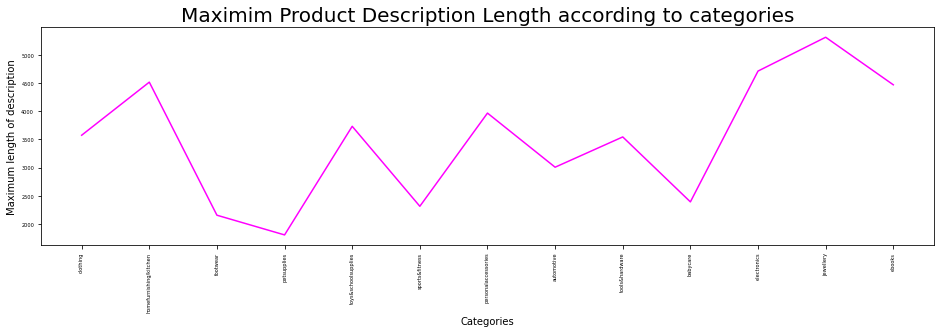

In [38]:
max_len1 = []
x = []

for category in temp_categories1:
  temp_df = products1[products1["primary_categories"]==category]
  temp_df = temp_df[temp_df["main_category"]==1]
  try:
    temp_max_len1 = max(temp_df["description"].str.len())
    x.append(category)
    max_len1.append(temp_max_len1)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Maximim Product Description Length according to categories", fontsize=20)
plt.ylabel("Maximum length of description", fontsize=10)
plt.xlabel("Categories", fontsize=10)
plt.xticks(fontsize=5,rotation=90)
plt.yticks(fontsize=5)
plt.plot(x,max_len1, color = "magenta")

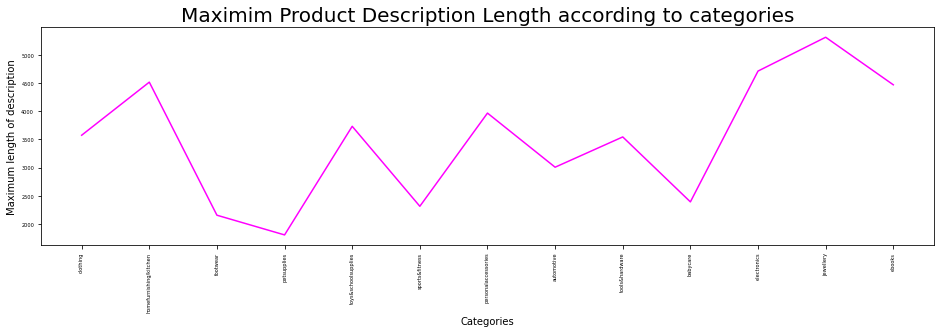

In [39]:
max_len2 = []
x = []

for category in temp_categories2:
  temp_df = products2[products2["primary_categories"]==category]
  temp_df = temp_df[temp_df["main_category"]==1]
  try:
    temp_max_len2 = max(temp_df["description"].str.len())
    x.append(category)
    max_len2.append(temp_max_len2)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Maximim Product Description Length according to categories", fontsize=20)
plt.ylabel("Maximum length of description", fontsize=10)
plt.xlabel("Categories", fontsize=10)
plt.xticks(fontsize=5,rotation=90)
plt.yticks(fontsize=5)
plt.plot(x,max_len2, color = "magenta")